## Prophet


In [157]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import pandas as pd

# fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import add_changepoints_to_plot

# Custom
from process import load_data, split_data

In [76]:
sys.executable

'C:\\Users\\rick.arko\\Anaconda3\\envs\\dengue\\python.exe'

## Split Train/Test

In [196]:
holdout = .8

dfin = load_data()
dfin['ds'] = dfin['week_start_date']
dfin['y'] = dfin['total_cases']


df_sj = dfin[dfin['city'] == 'sj']
df_sj = df_sj.fillna(method='ffill')
X_trsj, X_valsj, y_trsj, y_valsj = split_data(df_sj, percent_holdout=holdout)

df_iq = dfin[dfin['city'] == 'iq']
df_iq = df_iq.fillna(method='ffill')
X_triq, X_valiq, y_triq, y_valiq = split_data(df_iq, percent_holdout=holdout)

## Basic Prophet SJ

In [197]:
model_sj = Prophet(
#     **{'weekly_seasonality': True}
#     n_changepoints=6
)
model_sj = model_sj.fit(X_trsj[['ds', 'y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


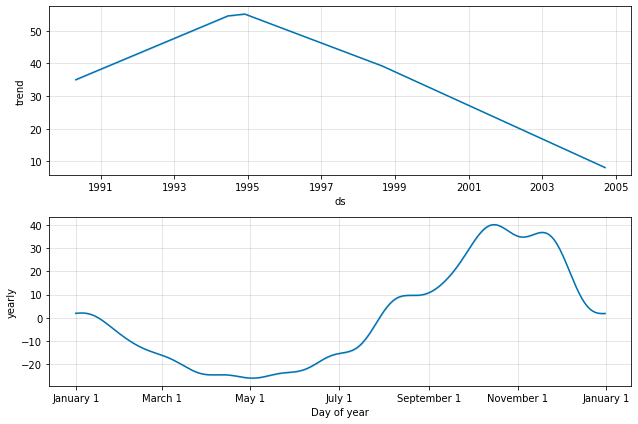

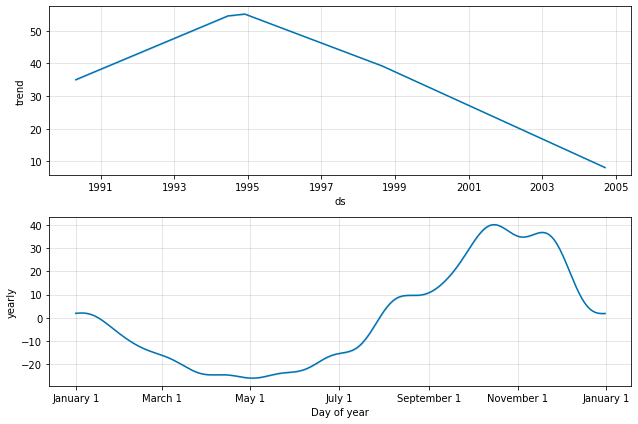

In [172]:
future_sj = model_sj.make_future_dataframe(len(y_valsj))
preds_sj = model_sj.predict()
model_sj.plot_components(preds_sj)

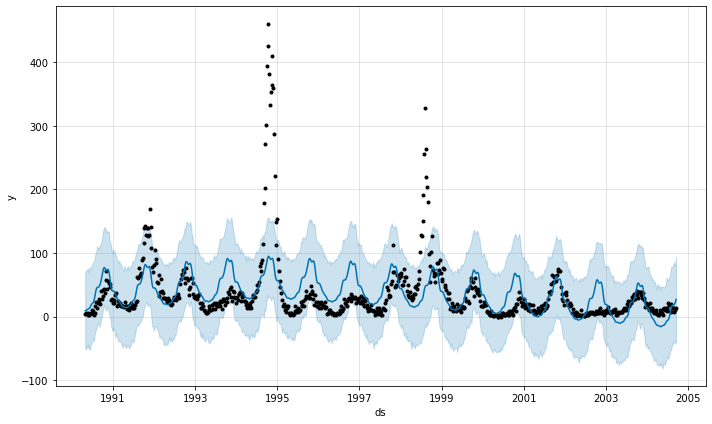

In [173]:
f_sj = model_sj.plot(preds_sj)

## Basic Prophet IQ

In [195]:
model_iq = Prophet(
#     **{'weekly_seasonality': True}
)
model_iq = model_iq.fit(X_triq[['ds', 'y']])

KeyError: "['ds'] not in index"

In [193]:
# X_triq.shape[0] +  X_valiq.shape[0] == df_iq.shape[0]

True

In [194]:
future_iq = model_iq.make_future_dataframe(len(X_valiq))
preds_iq = model_iq.predict()
model_iq.plot_components(preds_iq)

Exception: Model has not been fit.

In [138]:
y_valsj

749    27
750    13
751    18
752    16
753    16
       ..
931     4
932     3
933     1
934     3
935     5
Name: total_cases, Length: 187, dtype: int64

In [140]:
from sklearn.metrics import mean_absolute_error
mean

ModuleNotFoundError: No module named 'sklearn'

In [137]:
np.abs(preds_sj['yhat'] - y_valsj).mean(include_na=False)

TypeError: mean() got an unexpected keyword argument 'include_na'

In [135]:
preds_sj.yhat

0       9.181285
1       9.369672
2      10.349736
3      11.366563
4      11.937226
         ...    
744    18.232352
745    18.273473
746    19.580562
747    22.541465
748    26.959154
Name: yhat, Length: 749, dtype: float64

In [108]:
performance_metrics(preds_sj)

KeyError: 'cutoff'